<a href="https://colab.research.google.com/github/meghanasri776/python_commands/blob/main/Assignment7_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering Part 1 - Crime Data Exercise


Performing Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identifying the number of clusters formed and drawing inferences.





In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [ ]:
crime=pd.read_csv("crime_data.csv")

In [ ]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.tail(6)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
44,Vermont,2.2,48,32,11.2
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


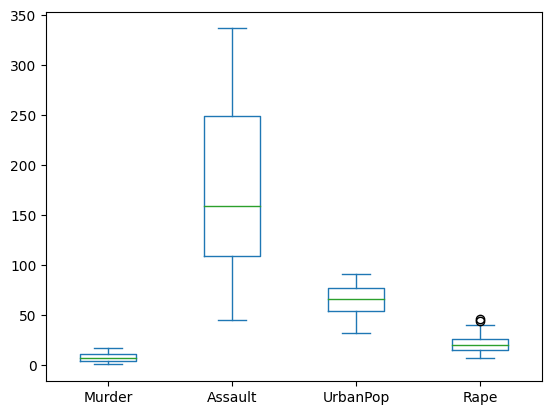

In [ ]:
crime.plot(kind='box')
plt.show()

In [ ]:
crime.shape

(50, 5)

Normalization

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
crime_norm = norm_func(crime.iloc[:,1:])

In [ ]:
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


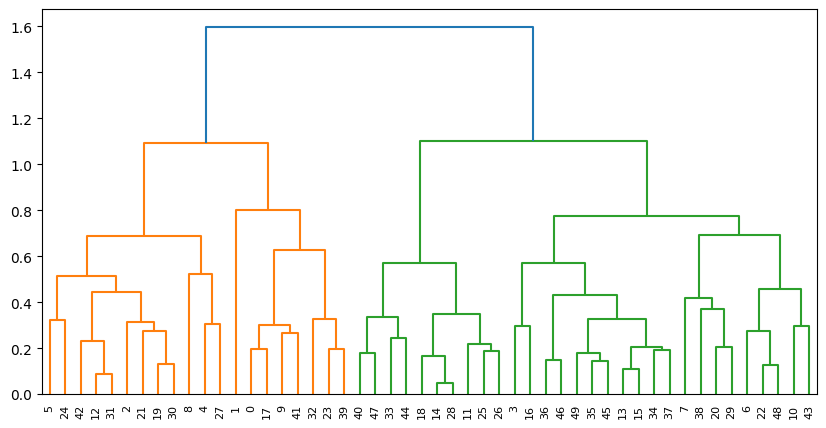

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram=sch.dendrogram(sch.linkage(crime_norm, method='complete'))
plt.show()

Hierarchical Clustering

In [ ]:
h_crime=crime.copy()
h_crime_norm=crime_norm.copy()

In [ ]:
h_cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='complete')
h_cluster

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
y_hc=h_cluster.fit_predict(h_crime_norm)
h_crime_norm["hclusterid"]=y_hc
h_crime_norm.head()

,Murder,Assault,UrbanPop,Rape,hclusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3


In [ ]:
h_crime_norm['hclusterid'].value_counts()

1    20
3    12
2    10
0     8
Name: hclusterid, dtype: int64

In [ ]:
h_crime['hclusterid']=h_cluster.labels_
h_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hclusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [ ]:
h_crime_norm.groupby(["hclusterid"]).agg(['mean']).reset_index()

,hclusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.800452,0.711473,0.364407,0.445413
1,1,0.296084,0.298973,0.657627,0.279070
2,2,0.143373,0.115411,0.293220,0.111886
3,3,0.607430,0.725742,0.785311,0.644703


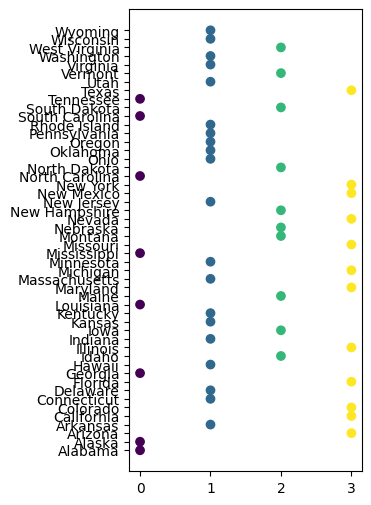

In [ ]:
plt.figure(figsize=(3,6))
plt.scatter(h_crime['hclusterid'],h_crime['Unnamed: 0'], c=h_cluster.labels_)
plt.show()

K-Means

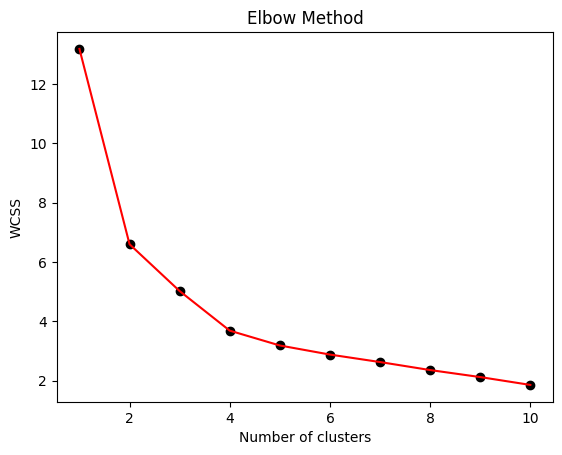

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,color='red')
plt.scatter(range(1, 11), wcss,color='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum no of cluster is K=4

In [ ]:
K4_crime_norm=crime_norm.copy()
K4_cluster=KMeans(n_clusters=4)
K4_cluster.fit(K4_crime_norm)

KMeans(n_clusters=4)

In [ ]:
K4_cluster.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 2, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
K4_crime=crime.copy()
K4_crime['K4_clusterid']=K4_cluster.labels_
K4_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,K4_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [ ]:
K4_crime.groupby(["K4_clusterid"])["Unnamed: 0"].apply(lambda x : tuple(x))

K4_clusterid
0    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
1    (Alabama, Arkansas, Georgia, Louisiana, Missis...
2    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
3    (Alaska, Arizona, California, Colorado, Florid...
Name: Unnamed: 0, dtype: object

In [ ]:
K4_crime['K4_clusterid'].value_counts()

2    17
0    13
3    12
1     8
Name: K4_clusterid, dtype: int64

In [ ]:
K4_cluster.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [ ]:
K4_crime.groupby('K4_clusterid').agg(['mean']).reset_index()

,K4_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,5.852941,141.176471,73.647059,19.335294
3,3,10.966667,264.000000,76.500000,33.608333


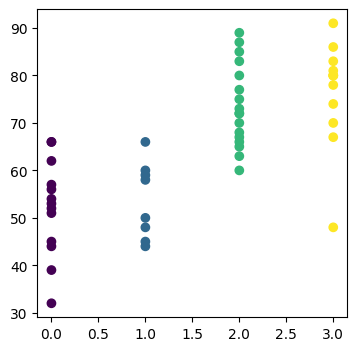

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(K4_crime['K4_clusterid'],K4_crime['UrbanPop'], c=K4_cluster.labels_)
plt.show()

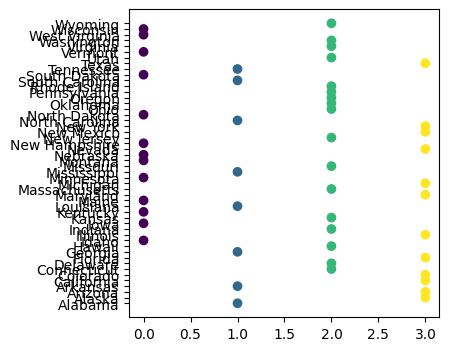

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(K4_crime['K4_clusterid'],K4_crime['Unnamed: 0'], c=K4_cluster.labels_)
plt.show()

DBScan

In [ ]:
db_crime=crime.copy()
db_crime_norm=crime_norm.copy()
dbscan=DBSCAN(eps=0.2,min_samples=3)
dbscan.fit(db_crime_norm)

DBSCAN(eps=0.2, min_samples=3)

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0])

In [ ]:
db_crime['db_clusterid']=dbscan.labels_
db_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,db_clusterid
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [ ]:
db_crime.groupby('db_clusterid').agg(['mean']).reset_index()

,db_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.957692,211.076923,68.615385,24.069231
1,0,4.644444,99.222222,59.000000,14.577778
2,1,11.600000,280.000000,70.333333,31.666667
3,2,4.033333,141.333333,73.333333,26.133333


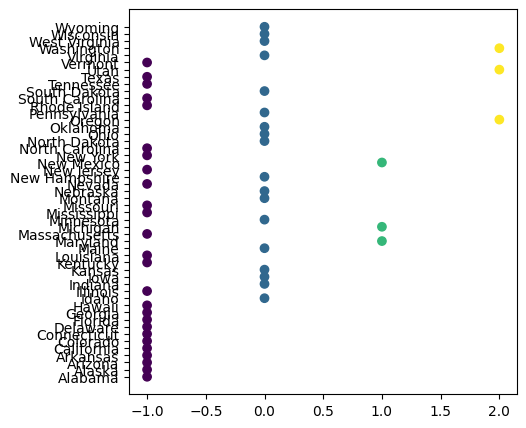

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(db_crime['db_clusterid'],db_crime['Unnamed: 0'], c=dbscan.labels_)
plt.show()

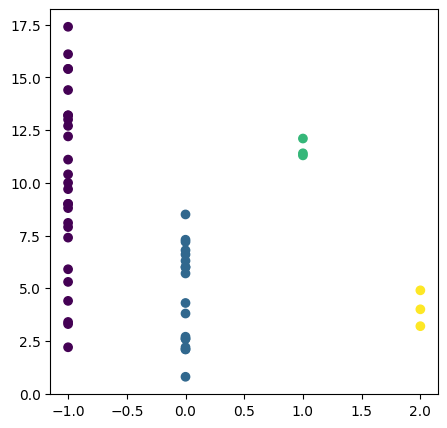

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(db_crime['db_clusterid'],db_crime['Murder'], c=dbscan.labels_)
plt.show()

2nd Assignment Clustering Part 2 - Airlines Dataset Exercise

In [ ]:
air=pd.read_csv('EastWestAirlines.csv')

In [ ]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
air.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [ ]:
al=air.drop(["ID#"],axis=1)

In [ ]:
al.shape

(3999, 11)

In [ ]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


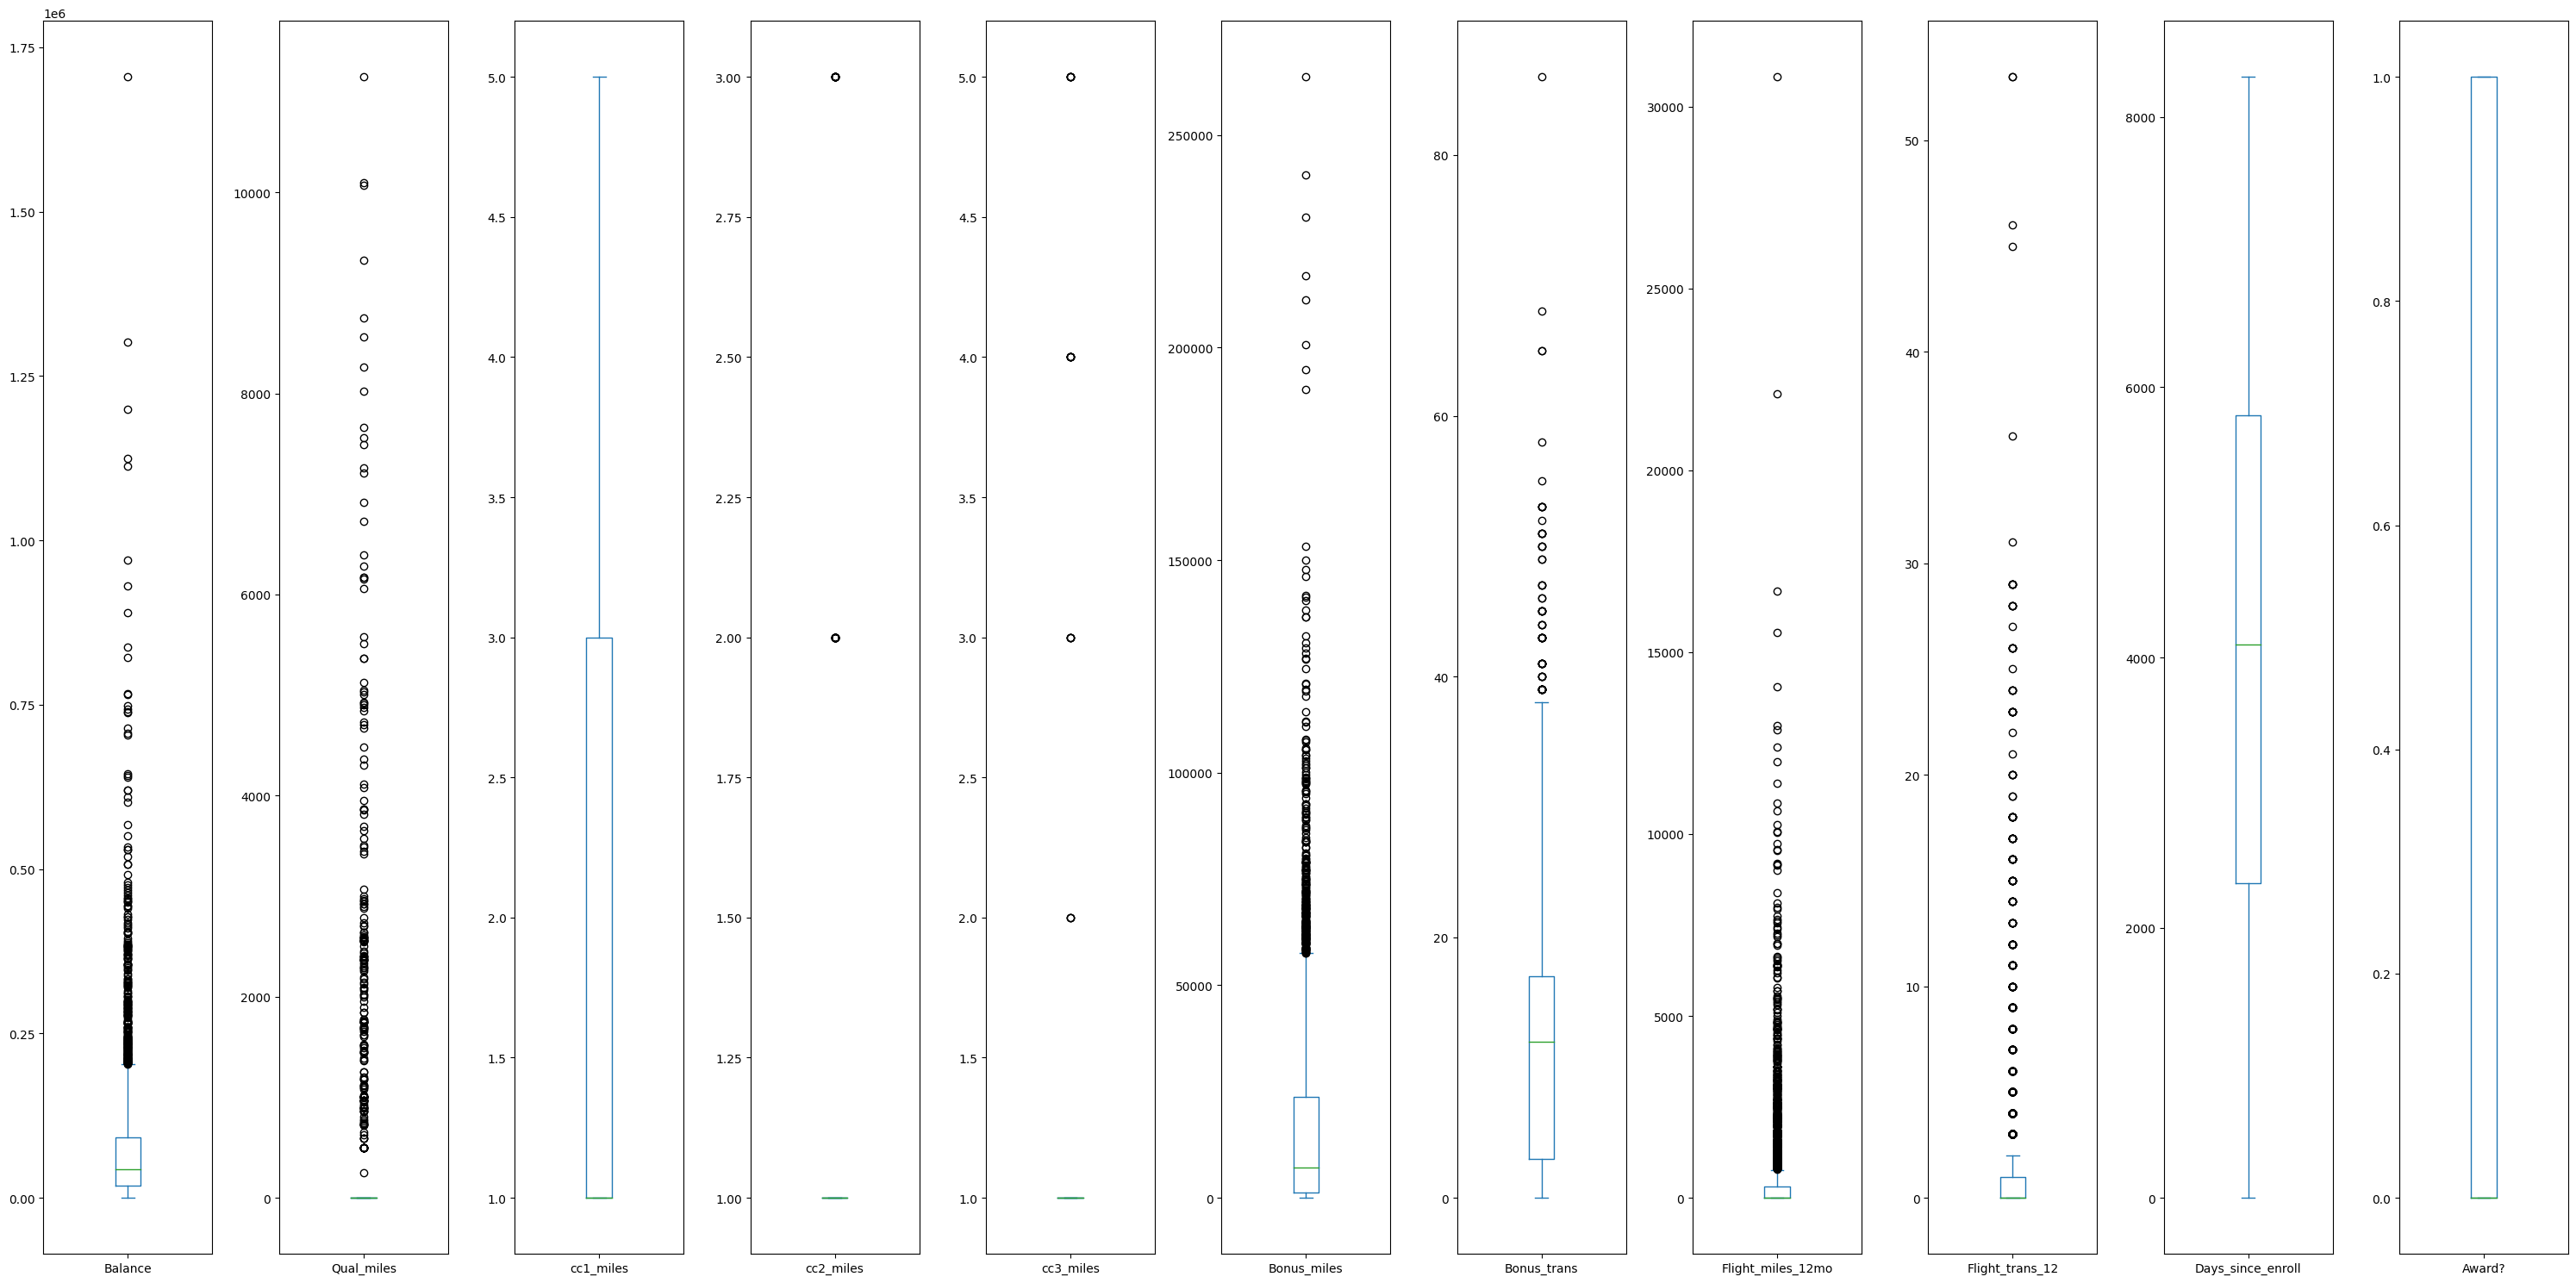

In [ ]:
al.plot(kind='box',subplots=True,figsize=(30,15))
plt.tight_layout()
plt.show()

Normalization

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
al_norm = norm_func(al.iloc[:,1:])
al_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


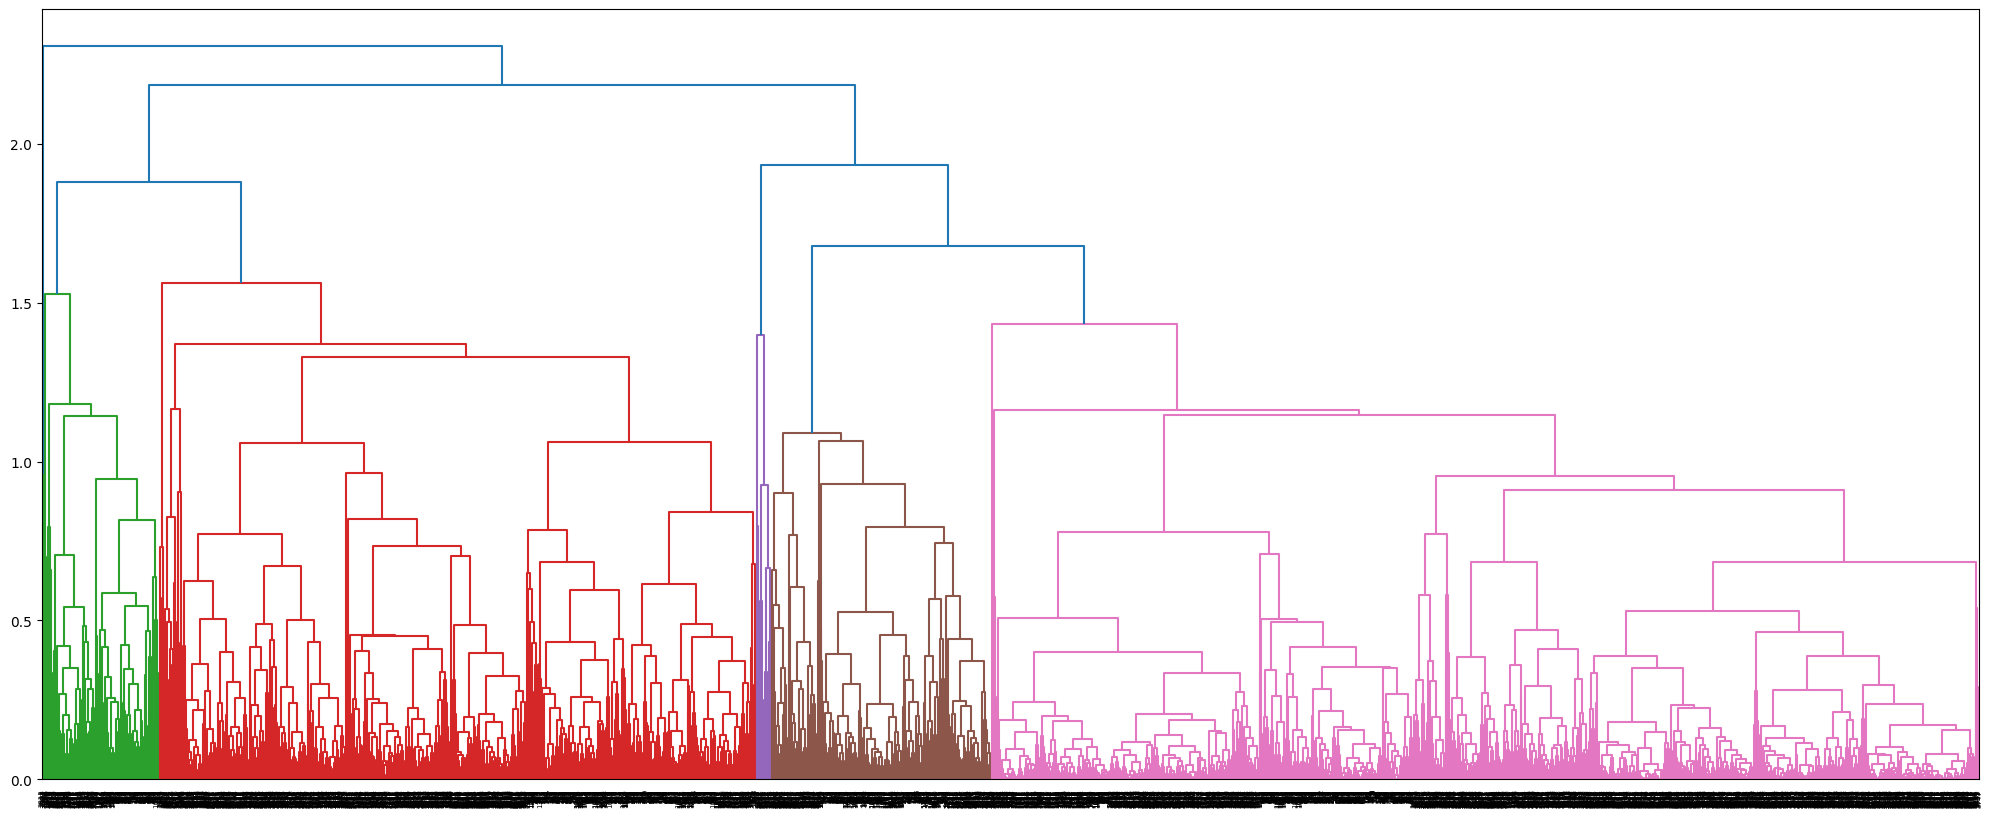

In [ ]:
plt.figure(figsize=(25, 10))
dendrogram=sch.dendrogram(sch.linkage(al_norm, method='complete'))
plt.show()

Hierarchical Clustering Paert 2

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hcluster

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
h_al_norm=al_norm.copy()
y_hc = hcluster.fit_predict(h_al_norm)
h_al_norm['h_clusterid']=y_hc
h_al_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,2
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,2
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [ ]:
h_al_norm['h_clusterid'].value_counts()

0    2493
2    1232
1     239
4      31
3       4
Name: h_clusterid, dtype: int64

In [ ]:
h_al=al.copy()
h_al['h_clusterid']=hcluster.labels_
h_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
h_al_norm.groupby(["h_clusterid"]).agg(['mean']).reset_index()

,h_clusterid,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.007937,0.178099,0.000201,0.002206,0.038740,0.105771,0.007368,0.012321,0.460745,0.000000
1,1,0.019321,0.972803,0.000000,0.025105,0.307643,0.285784,0.040764,0.072788,0.660694,1.000000
2,2,0.021979,0.309456,0.004464,0.000609,0.070776,0.161092,0.023176,0.041120,0.538216,1.000000
3,3,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000
4,4,0.002894,0.000000,0.741935,0.000000,0.055441,0.187547,0.014383,0.037127,0.456023,0.193548


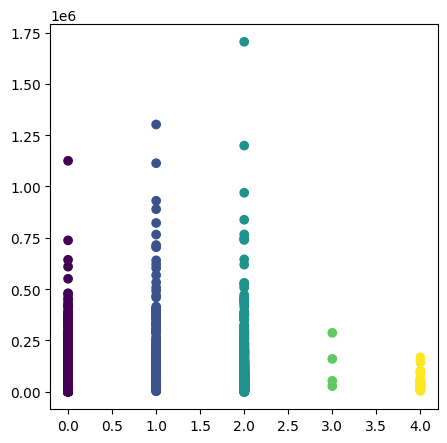

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(h_al['h_clusterid'],h_al['Balance'], c=hcluster.labels_)
plt.show()

K-Means

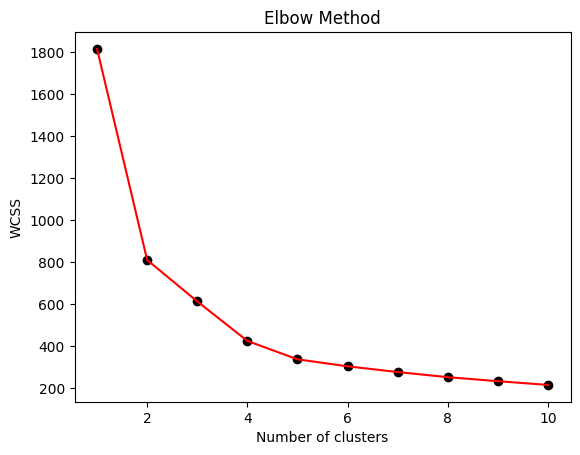

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(al_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss,color='red')
plt.scatter(range(1, 11), wcss,color='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Optimum no of cluster is K=4,5

Buliding the K-Means clustering algorithm for K=4

In [ ]:
K4_al_norm=al_norm.copy()
K4_cluster=KMeans(n_clusters=4)
K4_cluster.fit(K4_al_norm)

KMeans(n_clusters=4)

In [ ]:
K4_cluster.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
K4_al=al.copy()
K4_al['K4_clusterid']=K4_cluster.labels_
K4_al.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K4_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [ ]:
K4_al.groupby(["K4_clusterid"])["Balance"].apply(lambda x : tuple(x))

K4_clusterid
0    (97752, 443003, 104860, 96522, 28495, 51890, 9...
1    (28143, 19244, 41354, 14776, 16420, 40091, 433...
2    (20856, 13958, 185681, 19221, 23193, 2176, 603...
3    (84914, 177926, 276571, 121260, 75971, 38077, ...
Name: Balance, dtype: object

In [ ]:
K4_al['K4_clusterid'].value_counts()

1    1897
0     808
2     673
3     621
Name: K4_clusterid, dtype: int64

In [ ]:
K4_cluster.cluster_centers_

array([[ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.00000000e+00],
       [ 8.28362120e-03,  2.31945177e-02,  8.96151819e-03,
         1.05429626e-03,  1.26482465e-02,  7.54496083e-02,
         7.35308092e-03,  1.24327389e-02,  4.36111859e-01,
         7.21644966e-16],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 6.55837114e-03,  6.44122383e-01,  8.05152979e-04,
         5.63607085e-03,  1.18636504e-01,  2.00595439e-01,
         7.31260853e-03,  1.19405706e-02,  5.34640411e-01,
        -2.77555756e-16]])

In [ ]:
K4_al.groupby('K4_clusterid').agg(['mean']).reset_index()

,K4_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0


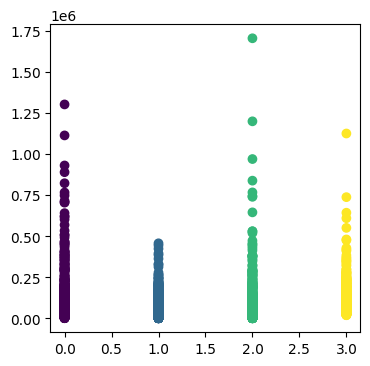

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(K4_al['K4_clusterid'],K4_al['Balance'], c=K4_cluster.labels_)
plt.show()

Building the K-Means clustering algorithm for k=5

In [ ]:
K5_cluster=KMeans(n_clusters=5)


In [ ]:
K5_cluster.fit(al_norm)

KMeans(n_clusters=5)

In [ ]:
K5_cluster.labels_

array([1, 1, 1, ..., 2, 4, 4], dtype=int32)

In [ ]:
K5_al=al.copy()
K5_al['K5_clusterid']=K5_cluster.labels_

In [ ]:
K5_al.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K5_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,4


In [ ]:
K5_al.groupby(["K5_clusterid"])["Balance"].apply(lambda x : tuple(x))

K5_clusterid
0    (28143, 19244, 41354, 14776, 16420, 40091, 433...
1    (20856, 13958, 185681, 19221, 23193, 2176, 603...
2    (84914, 177926, 276571, 121260, 75971, 38077, ...
3    (1625, 44665, 65021, 6341, 3641, 39207, 52046,...
4    (97752, 443003, 104860, 96522, 28495, 51890, 9...
Name: Balance, dtype: object

In [ ]:
K5_al['K5_clusterid'].value_counts()

3    1032
0     868
4     808
1     673
2     618
Name: K5_clusterid, dtype: int64

In [ ]:
K5_cluster.cluster_centers_

array([[ 8.06451613e-03,  3.05299539e-02,  9.79262673e-03,
         2.88018433e-04,  1.31485480e-02,  8.03906334e-02,
         7.91232441e-03,  1.37379358e-02,  6.71078504e-01,
         3.44169138e-15],
       [ 2.60542873e-02,  3.90044577e-02,  1.63447251e-02,
         2.22882615e-03,  3.35642727e-02,  1.21825219e-01,
         3.34267751e-02,  5.94073285e-02,  5.22892182e-01,
         1.00000000e+00],
       [ 6.59020789e-03,  6.46035599e-01,  8.09061489e-04,
         5.66343042e-03,  1.19022293e-01,  2.00383834e-01,
         7.27197078e-03,  1.18458814e-02,  5.32620376e-01,
        -3.33066907e-16],
       [ 8.44382696e-03,  1.76841085e-02,  8.23643411e-03,
         1.69573643e-03,  1.23045313e-02,  7.17842978e-02,
         6.90692719e-03,  1.13902296e-02,  2.39980966e-01,
        -3.33066907e-16],
       [ 1.77912301e-02,  7.28960396e-01,  6.18811881e-04,
         6.49752475e-03,  1.72970238e-01,  2.34903868e-01,
         2.31602349e-02,  4.04212591e-02,  5.86139300e-01,
         1.

In [ ]:
K5_al.groupby('K5_clusterid').agg(['mean']).reset_index()

,K5_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,3,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
4,4,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0


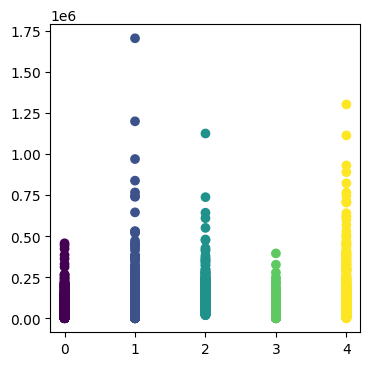

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(K5_al['K5_clusterid'],K5_al['Balance'], c=K5_cluster.labels_)
plt.show()

DBScan

In [ ]:
db_al=al.copy()
db_al_norm=al_norm.copy()

In [ ]:
dbscan=DBSCAN(eps=0.6,min_samples=5)
dbscan.fit(db_al_norm)

DBSCAN(eps=0.6)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
db_al['db_clusterid']=dbscan.labels_
db_al

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
db_al.groupby('db_clusterid').agg(['mean']).reset_index()

,db_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,84273.000000,166.666667,1.000000,1.000000,2.333333,118908.000000,32.666667,10479.666667,18.666667,1460.666667,0.666667
1,0,59798.169249,87.637267,1.705602,1.013905,1.007151,10198.320620,9.143822,226.382201,0.652761,3821.751291,0.000000
2,1,97070.248817,240.183232,2.663962,1.015551,1.018256,28760.204868,15.742394,837.403651,2.565247,4629.066261,1.000000


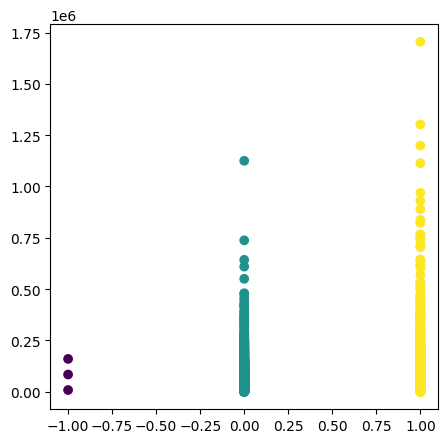

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(db_al['db_clusterid'],db_al['Balance'], c=dbscan.labels_)
plt.show()